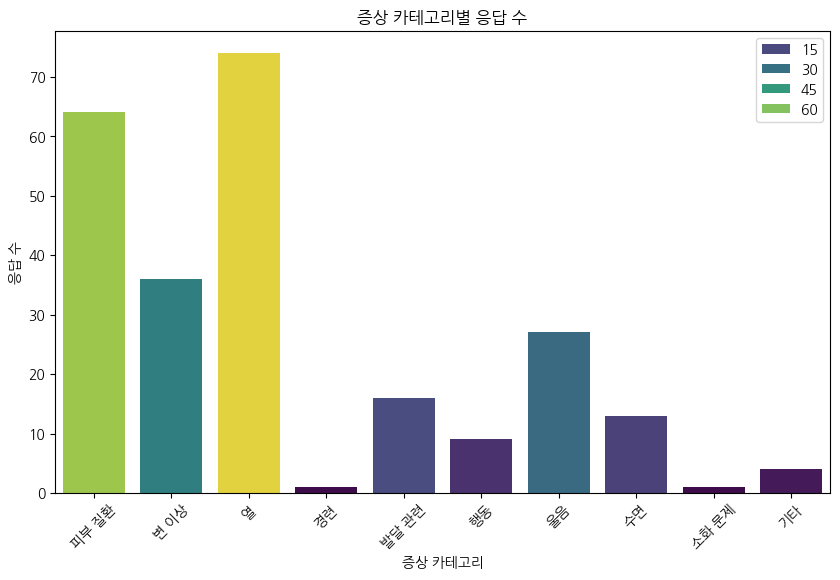

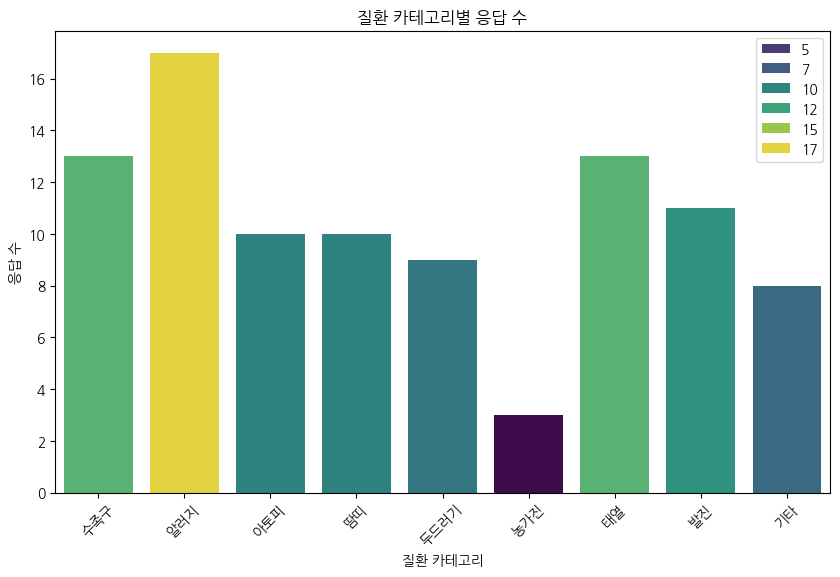

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import re  # 정규 표현식 사용을 위한 모듈

# 한글 폰트 설정
font_path = 'NanumGothic.ttf'  # 사용할 한글 폰트 경로
font_manager.fontManager.addfont(font_path)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 데이터 로드
file_path = '[BabyCareAI]AI 육아 앱 관련 설문조사(응답) (1).xlsx'
survey_data = pd.read_excel(file_path, engine='openpyxl')

# 열 이름 정의
column_symptoms = '아이에게 원인을 알 수 없는 증상이 발생하여 당황한 경험이 있으신가요?\n있다면, 어떤 증상에 대한 것인가요?'
column_diseases = '만약 \'피부 질환\'에 체크하셨다면, 해당 질환은 무엇이었나요?'

# 주요 카테고리 정의
categories_symptoms = {
    '피부 질환': ['태열', '땀띠', '침독', '알러지', '수족구'],
    '변 이상': ['변(색깔, 묽기 등)'],
    '열': ['열', '고열', '열성경련 증세'],
    '경련': [' 경련'],
    '발달 관련': ['발달'],
    '행동': ['행동'],
    '울음': ['울음'],
    '수면': ['수면'],
    '소화 문제': ['토', '구토'],
    '기타': ['해당 경험 없음', '기타']
}

categories_diseases = {
    '수족구': ['수족구'],
    '알러지': ['알러지', '알레르기', '모기알러지', '모기 알레르기', '모기 알레르기'],
    '아토피': ['아토피', '아토피피부염', '아토피 피부염'],
    '땀띠': ['땀띠', '열발진', '열꽃'],
    '두드러기': ['두드러기', '원인불명의두드러기', '이유를 알 수 없는 두드러기'],
    '농가진': ['농가진'],
    '태열': ['태열', '태텰'],
    '발진': ['발진', '피부 발진'],
    '기타': ['해당없음', '원인불명', '신생아 여드름', '파라바이러스', '황달', '천연오일로 인한 트러블']
}

# 각 카테고리의 카운트를 저장할 딕셔너리 초기화
category_symptoms_counts = {category: 0 for category in categories_symptoms.keys()}
category_diseases_counts = {category: 0 for category in categories_diseases.keys()}

# 응답에서 증상 카테고리 카운트
for response in survey_data[column_symptoms]:
    for category, keywords in categories_symptoms.items():
        if category == '열':
            # '열'이라는 단어가 포함되어 있는지 확인
            if re.search(r'\b열\b', response):
                category_symptoms_counts[category] += 1
        else:
            if any(keyword in response for keyword in keywords):
                category_symptoms_counts[category] += 1

# 응답에서 질환 카테고리 카운트
for response in survey_data[column_diseases]:
    if pd.isna(response):  # NaN 값 무시
        continue
    for category, keywords in categories_diseases.items():
        if any(keyword in response for keyword in keywords):
            category_diseases_counts[category] += 1

# 증상 카테고리 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=list(category_symptoms_counts.keys()), y=list(category_symptoms_counts.values()), palette='viridis', hue=list(category_symptoms_counts.values()))
plt.title('증상 카테고리별 응답 수')
plt.xlabel('증상 카테고리')
plt.ylabel('응답 수')
plt.xticks(rotation=45)
plt.show()

# 질환 카테고리 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=list(category_diseases_counts.keys()), y=list(category_diseases_counts.values()), palette='viridis', hue=list(category_diseases_counts.values()))
plt.title('질환 카테고리별 응답 수')
plt.xlabel('질환 카테고리')
plt.ylabel('응답 수')
plt.xticks(rotation=45)
plt.show()


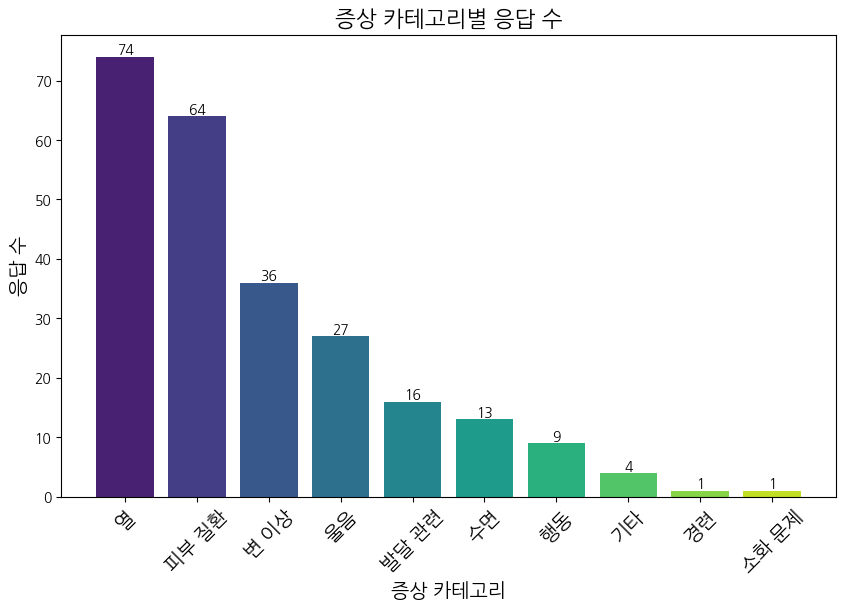

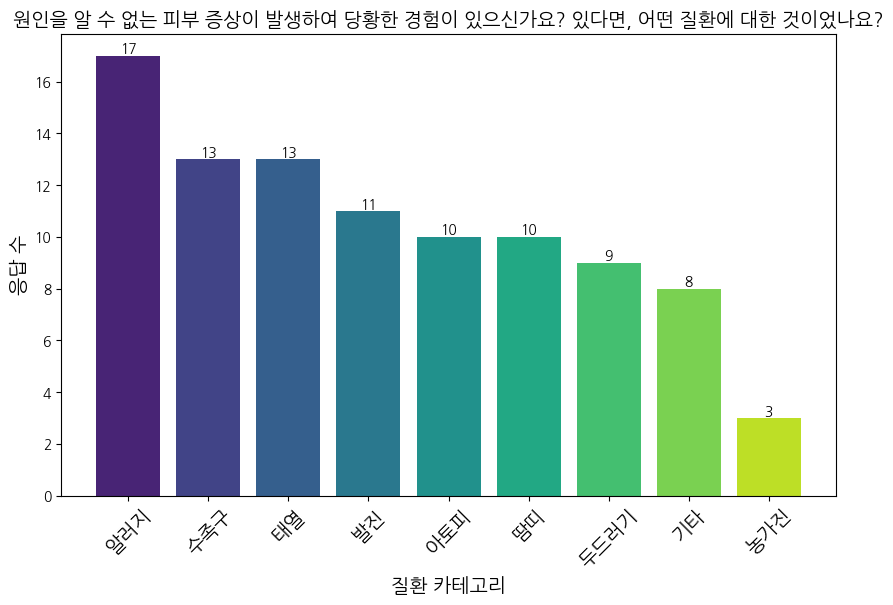

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 증상 카테고리 시각화
plt.figure(figsize=(10, 6))
symptom_counts_sorted = dict(sorted(category_symptoms_counts.items(), key=lambda item: item[1], reverse=True))
symptom_counts_values = list(symptom_counts_sorted.values())
symptom_categories = list(symptom_counts_sorted.keys())

# 색상 팔레트 생성
colors = sns.color_palette("viridis", len(symptom_counts_sorted))

bars = plt.bar(x=symptom_categories, height=symptom_counts_values, color=colors)

# 빈도수 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

plt.title('증상 카테고리별 응답 수', fontsize=16)
plt.xlabel('증상 카테고리', fontsize=14)
plt.ylabel('응답 수', fontsize=14)
plt.xticks(rotation=45, fontsize=14, fontstyle='italic')

plt.show()

# 질환 카테고리 시각화
plt.figure(figsize=(10, 6))
disease_counts_sorted = dict(sorted(category_diseases_counts.items(), key=lambda item: item[1], reverse=True))
disease_counts_values = list(disease_counts_sorted.values())
disease_categories = list(disease_counts_sorted.keys())

# 색상 팔레트 생성
colors = sns.color_palette("viridis", len(disease_counts_sorted))

bars = plt.bar(x=disease_categories, height=disease_counts_values, color=colors)

# 빈도수 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10)

plt.title('원인을 알 수 없는 피부 증상이 발생하여 당황한 경험이 있으신가요? 있다면, 어떤 질환에 대한 것이었나요?', fontsize=14)
plt.xlabel('질환 카테고리', fontsize=14)
plt.ylabel('응답 수', fontsize=14)
plt.xticks(rotation=45, fontsize=14, fontstyle='italic')

plt.show()
